In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("train.csv")
data.head()

Unnamed: 0 Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       25629   INN25630             2               1                     2   
1       14473   INN14474             2               1                     1   
2       23720   INN23721             2               0                     0   
3        5843   INN05844             2               0                     2   
4       18709   INN18710             1               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  1       Meal Plan 1                           0   
1                  1       Meal Plan 1                           0   
2                  3       Meal Plan 1                           0   
3                  5       Meal Plan 1                           0   
4                  2       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1         26          2017             10            17   
1        Room_Type 1         98          2018              7            16   
2        Room_Type 1        433          2018              9             8   
3        Room_Type 1        195          2018              8             8   
4        Room_Type 1        188          2018              6            15   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0              Online               0                             0   
1              Online               0                             0   
2             Offline               0                             0   
3             Offline               0                             0   
4             Offline               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              161.00   
1                                     0              121.50   
2                                     0               70.00   
3                                     0               72.25   
4                                     0              130.00   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       2   Not_Canceled  
2                       0       Canceled  
3                       0   Not_Canceled  
4                       0       Canceled

In [3]:
data.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
data.drop(['Unnamed: 0','Booking_ID'],axis=1,inplace=True)

In [5]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1         26   
1       Meal Plan 1                           0        Room_Type 1         98   
2       Meal Plan 1                           0        Room_Type 1        433   
3       Meal Plan 1                           0        Room_Type 1        195   
4       Meal Plan 1                           0        Room_Type 1        188   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10            17              Online   
1          2018              7            16              Online   
2          2018              9             8             Offline   
3          2018              8             8             Offline   
4          2018              6            15             Offline   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              161.00   
1                                     0              121.50   
2                                     0               70.00   
3                                     0               72.25   
4                                     0              130.00   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       2   Not_Canceled  
2                       0       Canceled  
3                       0   Not_Canceled  
4                       0       Canceled

In [6]:
data.shape

(29020, 18)

In [7]:
data.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
data.duplicated().sum()

7661

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(21359, 18)

In [12]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
data['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [14]:
data['no_of_children'].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [15]:
data['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [16]:
data['no_of_week_nights'].value_counts()

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

In [17]:
data['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

In [18]:
data['required_car_parking_space'].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [19]:
data['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [20]:
data['arrival_year'].value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

In [21]:
data['arrival_month'].value_counts()

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

In [22]:
data['market_segment_type'].value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [23]:
data['market_segment_type'].value_counts()

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

In [24]:
data['booking_status'].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [25]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1         26   
1       Meal Plan 1                           0        Room_Type 1         98   
2       Meal Plan 1                           0        Room_Type 1        433   
3       Meal Plan 1                           0        Room_Type 1        195   
4       Meal Plan 1                           0        Room_Type 1        188   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10            17              Online   
1          2018              7            16              Online   
2          2018              9             8             Offline   
3          2018              8             8             Offline   
4          2018              6            15             Offline   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              161.00   
1                                     0              121.50   
2                                     0               70.00   
3                                     0               72.25   
4                                     0              130.00   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       2   Not_Canceled  
2                       0       Canceled  
3                       0   Not_Canceled  
4                       0       Canceled

## our target varibles has imbalanced data

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [27]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [28]:
cat_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',]

In [29]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [30]:
print(f'Length of cat_cols {len(cat_cols)}')
print(f'Length of num_cols {len(num_cols)}')

Length of cat_cols 4
Length of num_cols 14


# Data Analysis

In [31]:
df = data.copy()

In [32]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1         26   
1       Meal Plan 1                           0        Room_Type 1         98   
2       Meal Plan 1                           0        Room_Type 1        433   
3       Meal Plan 1                           0        Room_Type 1        195   
4       Meal Plan 1                           0        Room_Type 1        188   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10            17              Online   
1          2018              7            16              Online   
2          2018              9             8             Offline   
3          2018              8             8             Offline   
4          2018              6            15             Offline   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              161.00   
1                                     0              121.50   
2                                     0               70.00   
3                                     0               72.25   
4                                     0              130.00   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       2   Not_Canceled  
2                       0       Canceled  
3                       0   Not_Canceled  
4                       0       Canceled

# Univariate Analysis Numeric Columns

In [33]:
def num_plot_dist(df,num_features):
    fig ,axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    for i,column in enumerate(num_features):
        sns.histplot(data=df, x=column ,ax=axes[i][0],kde=True,palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][0].set_title(f"boxplot for {column}")
    plt.tight_layout()
    plt.show()

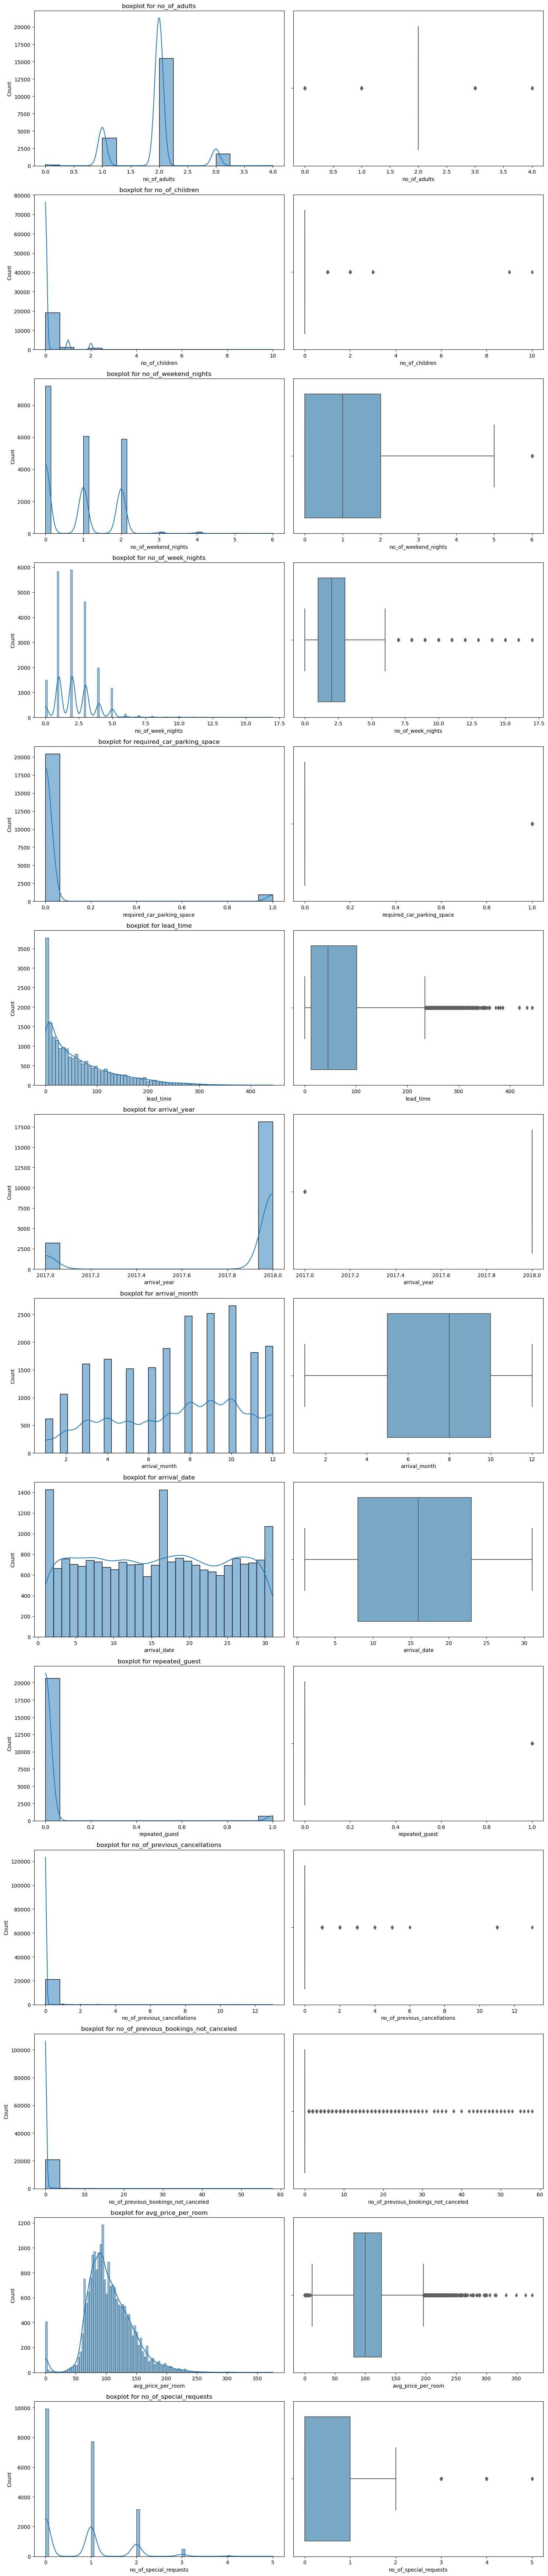

In [34]:
num_plot_dist(df,num_cols)

# Univariate Analysis Categorical Columns

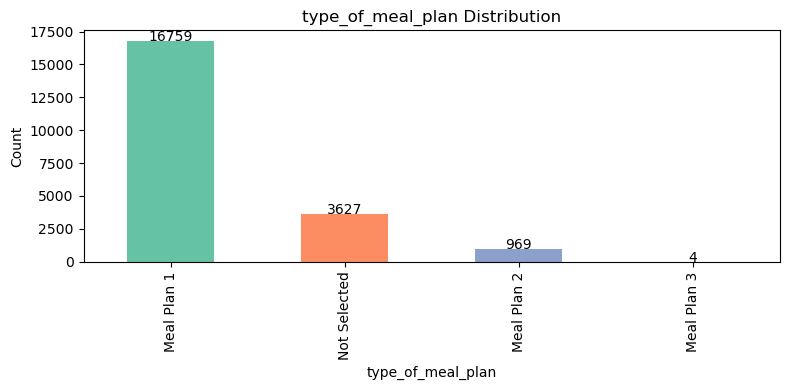

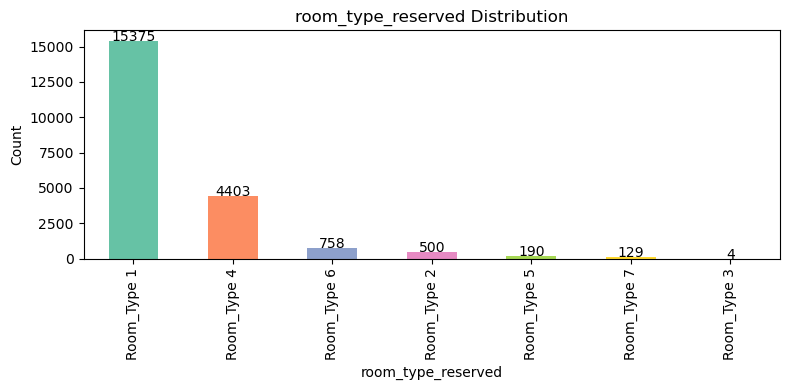

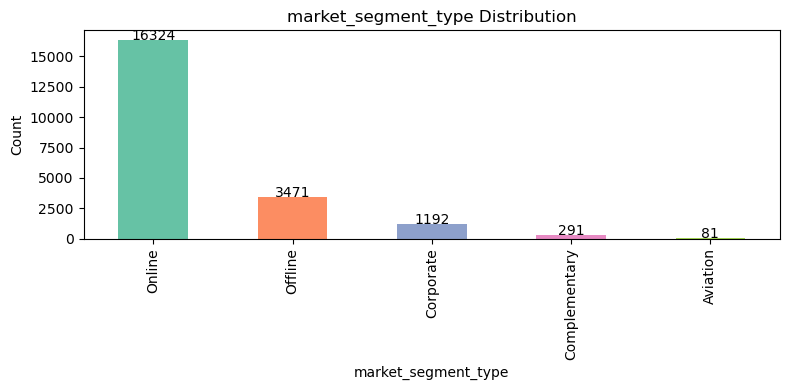

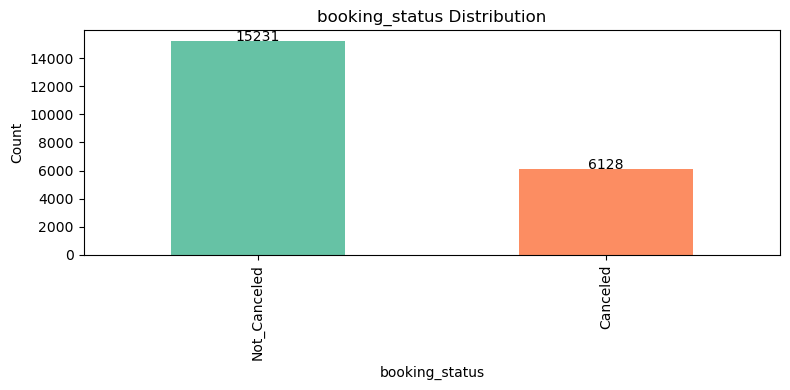

In [35]:
palette = sns.color_palette("Set2")  # You can try: "Set2", "husl", "Blues", etc.

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    counts = data[col].value_counts()
    colors = palette[:len(counts)]  # Adjust colors to number of bars

    ax = counts.plot(kind='bar', color=colors)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")

    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, str(v), ha='center')

    plt.tight_layout()
    plt.show()

# Bivaraite Analysis for numeric columns

In [36]:
def plot_bivaraite_num(df, target, num_feature):
    num_plots = len(num_feature)
    num_rows = (num_plots+1)//2
    
    fig, axes = plt.subplots(num_rows,2,figsize=(15,len(num_feature)*5))
    axes = axes.flatten()
    for i, column in enumerate(num_feature):
        sns.boxplot(x=target,y=column,ax=axes[i], data=df,palette="Set2")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()

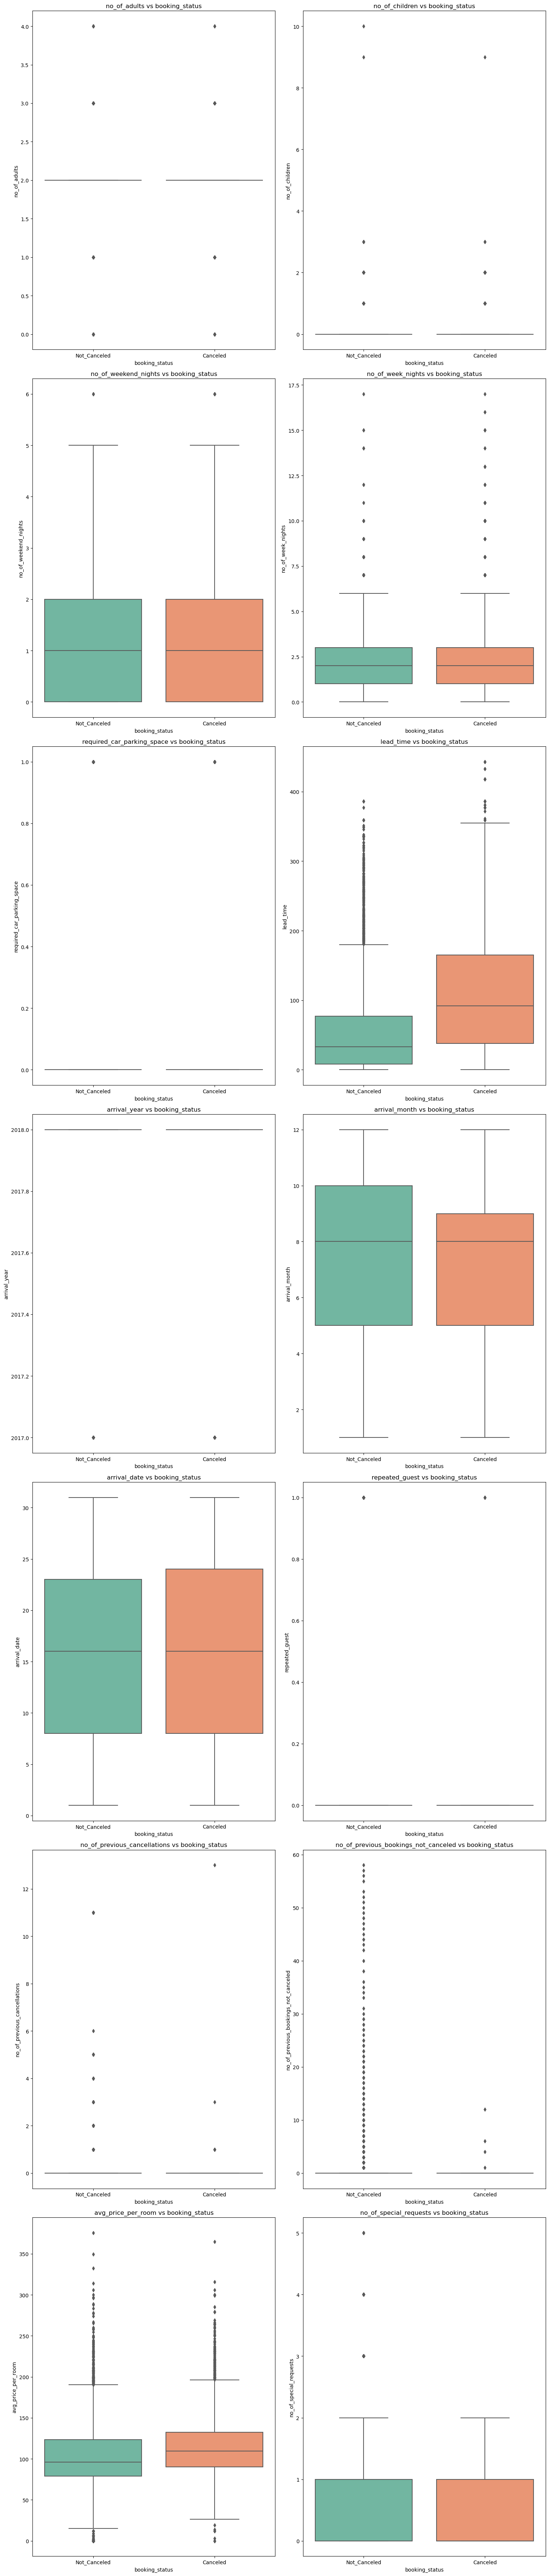

In [37]:
plot_bivaraite_num(data,'booking_status',num_cols)

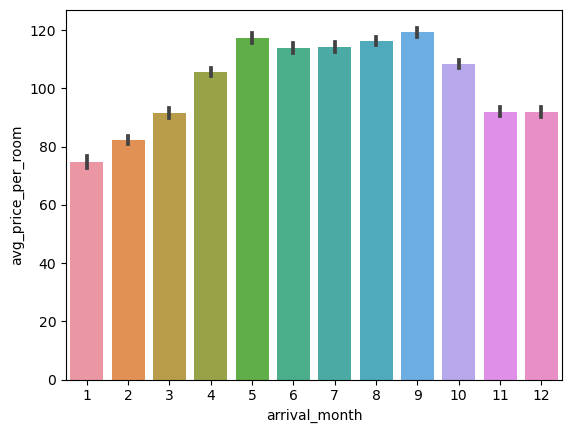

In [38]:
sns.barplot(x='arrival_month',y='avg_price_per_room',data=data)
plt.show()

In [39]:
def plot_bivaraite_cat(df, target, cat_feature):
    num_features = len(cat_feature)
    num_rows = (num_features+1)//2
    
    fig, axes = plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes = axes.flatten()
    
    for i,feature in enumerate(cat_feature):
        sns.countplot(x=feature,hue=target,data=df,palette="Set2",ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x',rotation=90)
    plt.tight_layout()
    plt.show()

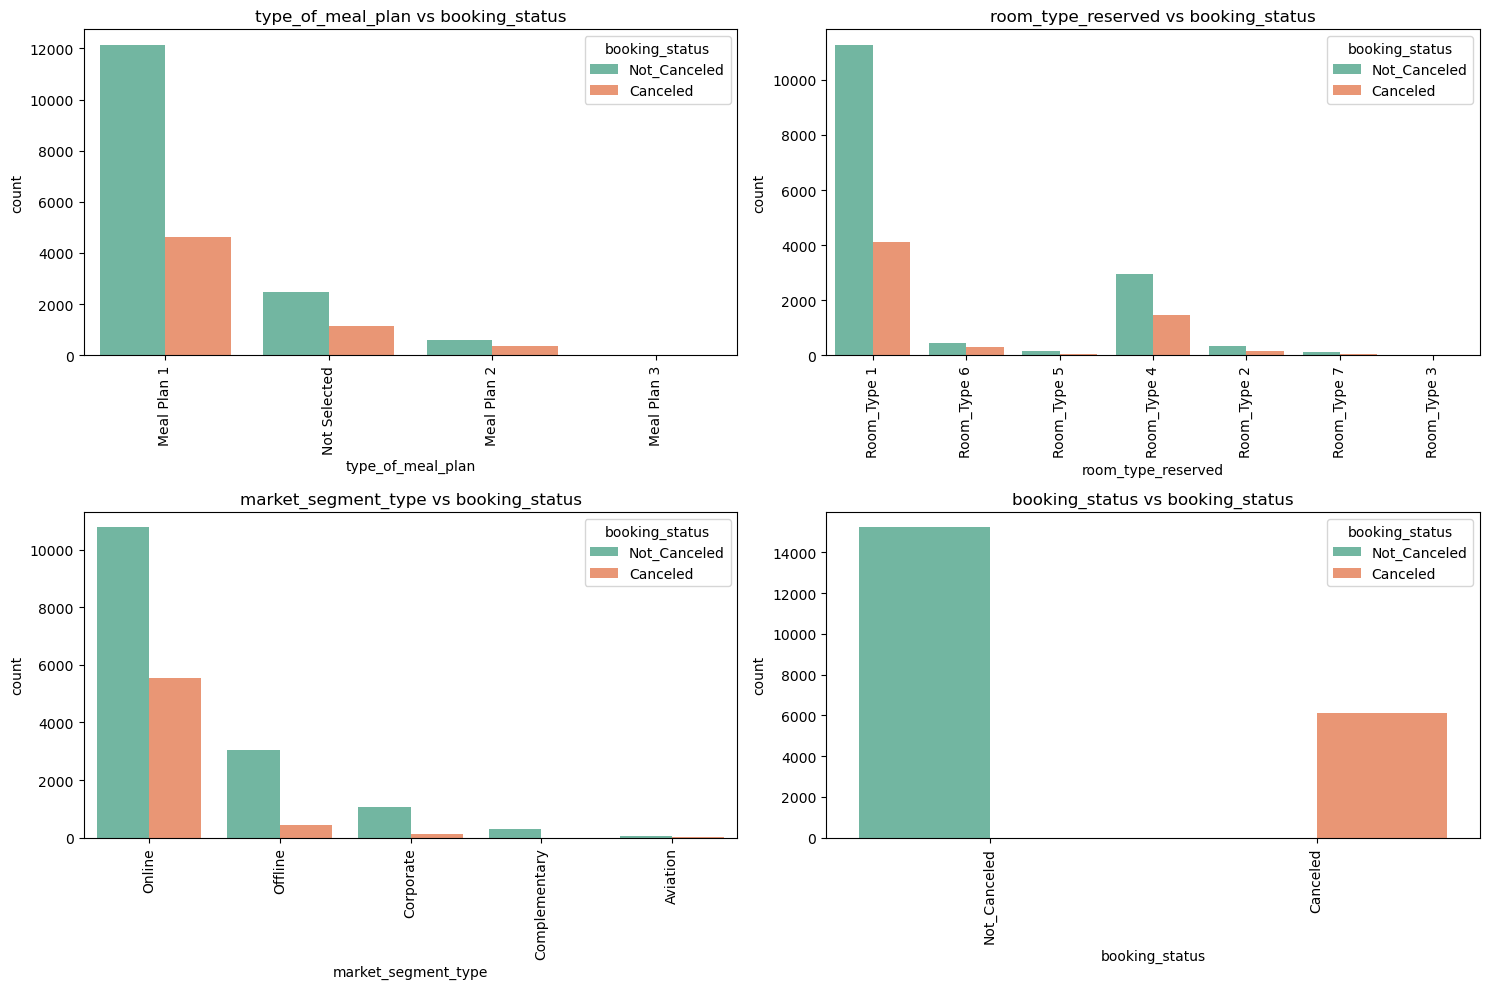

In [40]:
plot_bivaraite_cat(df,'booking_status',cat_cols)

## Data Processing

In [41]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1         26   
1       Meal Plan 1                           0        Room_Type 1         98   
2       Meal Plan 1                           0        Room_Type 1        433   
3       Meal Plan 1                           0        Room_Type 1        195   
4       Meal Plan 1                           0        Room_Type 1        188   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10            17              Online   
1          2018              7            16              Online   
2          2018              9             8             Offline   
3          2018              8             8             Offline   
4          2018              6            15             Offline   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              161.00   
1                                     0              121.50   
2                                     0               70.00   
3                                     0               72.25   
4                                     0              130.00   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       2   Not_Canceled  
2                       0       Canceled  
3                       0   Not_Canceled  
4                       0       Canceled

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [43]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [44]:
Encoder=LabelEncoder()
mappings={}
for column in cat_cols:
    df[column]=Encoder.fit_transform(df[column])
    mappings[column]={label: code for label, code in zip(Encoder.classes_,Encoder.transform(Encoder.classes_))}

In [45]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [46]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  0                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0         26          2017             10            17                    4   
1         98          2018              7            16                    4   
2        433          2018              9             8                    3   
3        195          2018              8             8                    3   
4        188          2018              6            15                    3   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              161.00   
1                                     0              121.50   
2                                     0               70.00   
3                                     0               72.25   
4                                     0              130.00   

   no_of_special_requests  booking_status  
0                       0               1  
1                       2               1  
2                       0               0  
3                       0               1  
4                       0               0

# Checking multicollinearity 

In [47]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [49]:
X=add_constant(df)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF_Values"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [50]:
vif_data

feature    VIF_Values
0                                  const  4.100197e+07
1                           no_of_adults  1.341180e+00
2                         no_of_children  1.282459e+00
3                   no_of_weekend_nights  1.073215e+00
4                      no_of_week_nights  1.125260e+00
5                      type_of_meal_plan  1.178228e+00
6             required_car_parking_space  1.036105e+00
7                     room_type_reserved  1.549859e+00
8                              lead_time  1.406287e+00
9                           arrival_year  1.288533e+00
10                         arrival_month  1.248028e+00
11                          arrival_date  1.003605e+00
12                   market_segment_type  1.704297e+00
13                        repeated_guest  1.765576e+00
14          no_of_previous_cancellations  1.396559e+00
15  no_of_previous_bookings_not_canceled  1.712854e+00
16                    avg_price_per_room  1.926372e+00
17                no_of_special_requests  1.267940e+00
18                        booking_status  1.389308e+00

**our data don't have any multicollinearity**

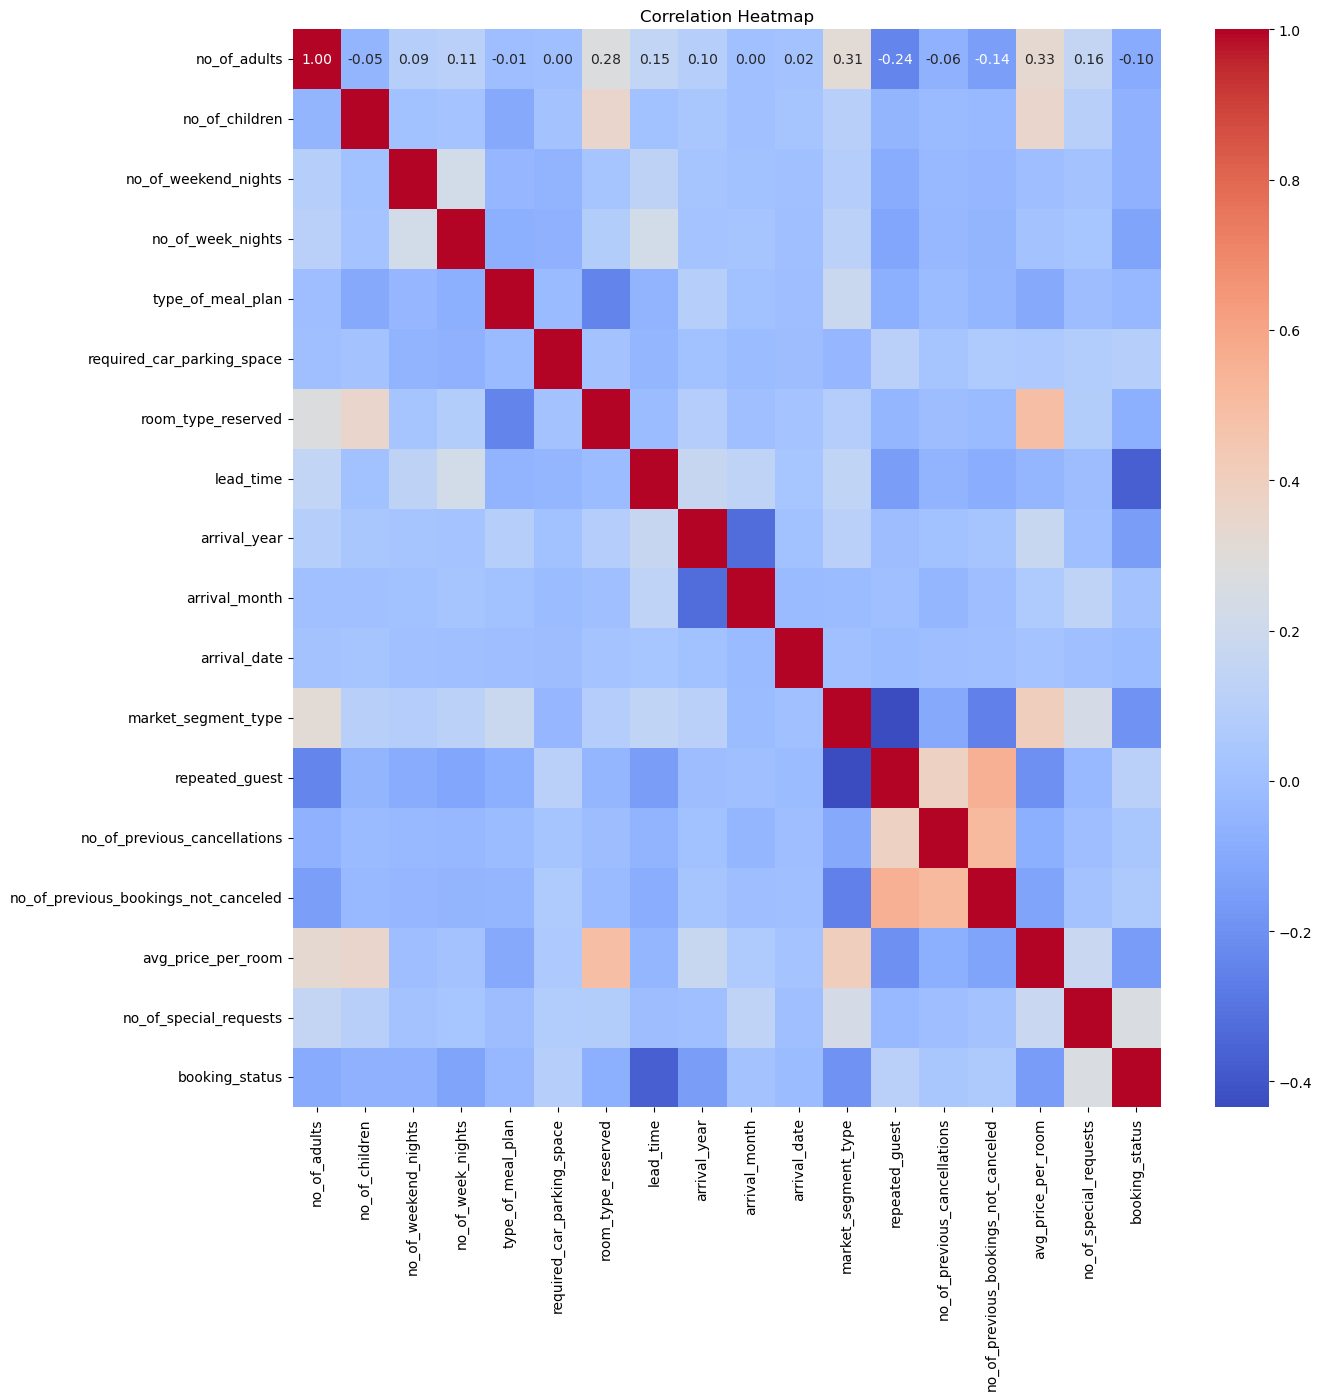

In [51]:
plt.figure(figsize=(14, 14))  # Set your desired figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Checking the skewness

In [52]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

# Apply log tranformation

for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])
    

In [53]:
from sklearn.preprocessing import PowerTransformer

# Select columns with high skewness
high_skew_cols = [col for col in df.columns if skewness[col] > 5]

# Apply Yeo-Johnson transformation to those columns
pt = PowerTransformer(method='yeo-johnson')

df[high_skew_cols] = pt.fit_transform(df[high_skew_cols])


In [54]:
updated_skewness = df.skew()
updated_skewness

no_of_adults                           -0.305652
no_of_children                          4.165696
no_of_weekend_nights                    0.636637
no_of_week_nights                       1.553657
type_of_meal_plan                       1.650716
required_car_parking_space              4.538315
room_type_reserved                      1.392145
lead_time                               1.405258
arrival_year                           -1.953273
arrival_month                          -0.293266
arrival_date                            0.010333
market_segment_type                    -2.333046
repeated_guest                          5.282330
no_of_previous_cancellations            9.611257
no_of_previous_bookings_not_canceled    5.476944
avg_price_per_room                      0.542888
no_of_special_requests                  0.922373
booking_status                         -0.942305
dtype: float64

In [57]:
df[high_skew_cols]

repeated_guest  no_of_previous_cancellations  \
0           -0.182985                     -0.102949   
1           -0.182985                     -0.102949   
2           -0.182985                     -0.102949   
3           -0.182985                     -0.102949   
4           -0.182985                     -0.102949   
...               ...                           ...   
29012       -0.182985                     -0.102949   
29013       -0.182985                     -0.102949   
29014       -0.182985                     -0.102949   
29015       -0.182985                     -0.102949   
29019       -0.182985                     -0.102949   

       no_of_previous_bookings_not_canceled  
0                                 -0.176883  
1                                 -0.176883  
2                                 -0.176883  
3                                 -0.176883  
4                                 -0.176883  
...                                     ...  
29012                             -0.176883  
29013                             -0.176883  
29014                             -0.176883  
29015                             -0.176883  
29019                             -0.176883  

[21359 rows x 3 columns]

## Handling Imbalanced Dataset

In [58]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [59]:
X = df.drop(columns='booking_status',axis=1)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  0                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0         26          2017             10            17                    4   
1         98          2018              7            16                    4   
2        433          2018              9             8                    3   
3        195          2018              8             8                    3   
4        188          2018              6            15                    3   

   repeated_guest  no_of_previous_cancellations  \
0       -0.182985                     -0.102949   
1       -0.182985                     -0.102949   
2       -0.182985                     -0.102949   
3       -0.182985                     -0.102949   
4       -0.182985                     -0.102949   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.176883              161.00   
1                             -0.176883              121.50   
2                             -0.176883               70.00   
3                             -0.176883               72.25   
4                             -0.176883              130.00   

   no_of_special_requests  
0                       0  
1                       2  
2                       0  
3                       0  
4                       0

In [60]:
y=df['booking_status']

In [61]:
y

0        1
1        1
2        0
3        1
4        0
        ..
29012    0
29013    1
29014    1
29015    1
29019    1
Name: booking_status, Length: 21359, dtype: int32

In [ ]:
!pip install imbalanced-learn

In [62]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

In [65]:
X_res

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               1                     2                  1   
1                 2               1                     1                  1   
2                 2               0                     0                  3   
3                 2               0                     2                  5   
4                 1               0                     0                  2   
...             ...             ...                   ...                ...   
30457             2               0                     0                  2   
30458             1               0                     1                  3   
30459             2               0                     1                  2   
30460             1               0                     1                  1   
30461             2               0                     0                  1   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                      0                           0                   0   
1                      0                           0                   0   
2                      0                           0                   0   
3                      0                           0                   0   
4                      0                           0                   0   
...                  ...                         ...                 ...   
30457                  1                           0                   0   
30458                  0                           0                   0   
30459                  1                           0                   0   
30460                  3                           0                   0   
30461                  3                           0                   0   

       lead_time  arrival_year  arrival_month  arrival_date  \
0             26          2017             10            17   
1             98          2018              7            16   
2            433          2018              9             8   
3            195          2018              8             8   
4            188          2018              6            15   
...          ...           ...            ...           ...   
30457        265          2018              6            24   
30458        103          2018              4            18   
30459         27          2018              6            12   
30460         46          2018              4             4   
30461         12          2018             10             3   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                        4       -0.182985                     -0.102949   
1                        4       -0.182985                     -0.102949   
2                        3       -0.182985                     -0.102949   
3                        3       -0.182985                     -0.102949   
4                        3       -0.182985                     -0.102949   
...                    ...             ...                           ...   
30457                    3       -0.182985                     -0.102949   
30458                    3       -0.182985                     -0.102949   
30459                    4       -0.182985                     -0.102949   
30460                    4       -0.182985                     -0.102949   
30461                    4       -0.182985                     -0.102949   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                 -0.176883          161.000000   
1                                 -0.176883          121.500000   
2                                 -0.176883           70.000000   
3                                 -0.176883           72.250000   
4                                 -0.176883          130.000000   
...                                     ...                 .

In [66]:
y_res=pd.Series(y_res)
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [67]:
balanced_df = pd.DataFrame(X_res,columns=X.columns)
balanced_df['booking_status'] = y_res

In [68]:
balanced_df.shape

(30462, 18)

In [69]:
balanced_df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  0                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0         26          2017             10            17                    4   
1         98          2018              7            16                    4   
2        433          2018              9             8                    3   
3        195          2018              8             8                    3   
4        188          2018              6            15                    3   

   repeated_guest  no_of_previous_cancellations  \
0       -0.182985                     -0.102949   
1       -0.182985                     -0.102949   
2       -0.182985                     -0.102949   
3       -0.182985                     -0.102949   
4       -0.182985                     -0.102949   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.176883              161.00   
1                             -0.176883              121.50   
2                             -0.176883               70.00   
3                             -0.176883               72.25   
4                             -0.176883              130.00   

   no_of_special_requests  booking_status  
0                       0               1  
1                       2               1  
2                       0               0  
3                       0               1  
4                       0               0

In [70]:
df = balanced_df.copy()

In [71]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  0                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0         26          2017             10            17                    4   
1         98          2018              7            16                    4   
2        433          2018              9             8                    3   
3        195          2018              8             8                    3   
4        188          2018              6            15                    3   

   repeated_guest  no_of_previous_cancellations  \
0       -0.182985                     -0.102949   
1       -0.182985                     -0.102949   
2       -0.182985                     -0.102949   
3       -0.182985                     -0.102949   
4       -0.182985                     -0.102949   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.176883              161.00   
1                             -0.176883              121.50   
2                             -0.176883               70.00   
3                             -0.176883               72.25   
4                             -0.176883              130.00   

   no_of_special_requests  booking_status  
0                       0               1  
1                       2               1  
2                       0               0  
3                       0               1  
4                       0               0

# Feature_selection

In [72]:
len(df.columns)

18

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
X = df.drop(columns='booking_status',axis=1)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               1                     2                  1   
1             2               1                     1                  1   
2             2               0                     0                  3   
3             2               0                     2                  5   
4             1               0                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  0                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0         26          2017             10            17                    4   
1         98          2018              7            16                    4   
2        433          2018              9             8                    3   
3        195          2018              8             8                    3   
4        188          2018              6            15                    3   

   repeated_guest  no_of_previous_cancellations  \
0       -0.182985                     -0.102949   
1       -0.182985                     -0.102949   
2       -0.182985                     -0.102949   
3       -0.182985                     -0.102949   
4       -0.182985                     -0.102949   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.176883              161.00   
1                             -0.176883              121.50   
2                             -0.176883               70.00   
3                             -0.176883               72.25   
4                             -0.176883              130.00   

   no_of_special_requests  
0                       0  
1                       2  
2                       0  
3                       0  
4                       0

In [75]:
y=df['booking_status']

In [76]:
model=RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [77]:
feature_importance = model.feature_importances_
feature_importance 

array([0.01792813, 0.00681824, 0.02987834, 0.04439414, 0.02000131,
       0.0122878 , 0.0194663 , 0.26311718, 0.0160218 , 0.08458939,
       0.08423187, 0.0546532 , 0.00522616, 0.00038398, 0.00386715,
       0.1511193 , 0.18601571])

In [78]:
feature_importances= pd.DataFrame({'feature':X.columns,'importance':feature_importance})
top_features_importance_df=feature_importances.sort_values(by='importance', ascending=False)

In [79]:
top_features_importance_df

feature  importance
7                              lead_time    0.263117
16                no_of_special_requests    0.186016
15                    avg_price_per_room    0.151119
9                          arrival_month    0.084589
10                          arrival_date    0.084232
11                   market_segment_type    0.054653
3                      no_of_week_nights    0.044394
2                   no_of_weekend_nights    0.029878
4                      type_of_meal_plan    0.020001
6                     room_type_reserved    0.019466
0                           no_of_adults    0.017928
8                           arrival_year    0.016022
5             required_car_parking_space    0.012288
1                         no_of_children    0.006818
12                        repeated_guest    0.005226
14  no_of_previous_bookings_not_canceled    0.003867
13          no_of_previous_cancellations    0.000384

In [80]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [88]:
top_ten_features = top_features_importance_df['feature'].head(10).values
top_ten_features

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved'], dtype=object)

In [89]:
top_10_df = df[top_ten_features.tolist() + ['booking_status']]
top_10_df.head()

lead_time  no_of_special_requests  avg_price_per_room  arrival_month  \
0         26                       0              161.00             10   
1         98                       2              121.50              7   
2        433                       0               70.00              9   
3        195                       0               72.25              8   
4        188                       0              130.00              6   

   arrival_date  market_segment_type  no_of_week_nights  no_of_weekend_nights  \
0            17                    4                  1                     2   
1            16                    4                  1                     1   
2             8                    3                  3                     0   
3             8                    3                  5                     2   
4            15                    3                  2                     0   

   type_of_meal_plan  room_type_reserved  booking_status  
0                  0                   0               1  
1                  0                   0               1  
2                  0                   0               0  
3                  0                   0               1  
4                  0                   0               0

In [90]:
top_10_df.shape

(30462, 11)

In [91]:
df = top_10_df.copy()

In [92]:
df.head()

lead_time  no_of_special_requests  avg_price_per_room  arrival_month  \
0         26                       0              161.00             10   
1         98                       2              121.50              7   
2        433                       0               70.00              9   
3        195                       0               72.25              8   
4        188                       0              130.00              6   

   arrival_date  market_segment_type  no_of_week_nights  no_of_weekend_nights  \
0            17                    4                  1                     2   
1            16                    4                  1                     1   
2             8                    3                  3                     0   
3             8                    3                  5                     2   
4            15                    3                  2                     0   

   type_of_meal_plan  room_type_reserved  booking_status  
0                  0                   0               1  
1                  0                   0               1  
2                  0                   0               0  
3                  0                   0               1  
4                  0                   0               0

In [93]:
X = df.drop(columns='booking_status',axis=1)
y=df['booking_status']

In [94]:
!pip install lightgbm


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score,classification_report

In [96]:
X.head()

lead_time  no_of_special_requests  avg_price_per_room  arrival_month  \
0         26                       0              161.00             10   
1         98                       2              121.50              7   
2        433                       0               70.00              9   
3        195                       0               72.25              8   
4        188                       0              130.00              6   

   arrival_date  market_segment_type  no_of_week_nights  no_of_weekend_nights  \
0            17                    4                  1                     2   
1            16                    4                  1                     1   
2             8                    3                  3                     0   
3             8                    3                  5                     2   
4            15                    3                  2                     0   

   type_of_meal_plan  room_type_reserved  
0                  0                   0  
1                  0                   0  
2                  0                   0  
3                  0                   0  
4                  0                   0

In [97]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: booking_status, dtype: int32

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
classifiers= {
    "Random Forest":RandomForestClassifier(random_state=42),
    "LogisticRegression":LogisticRegression(random_state=42),
    "GradientBoosting":GradientBoostingClassifier(random_state=42),
    "SVC":SVC(random_state=42),
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "XGBoost":XGBClassifier(random_state=42),
    "Lightgbm":LGBMClassifier(random_state=42),
    "AdaBoost":AdaBoostClassifier(random_state=42),
}

In [100]:
metrics = {
    "Model": [], 
    "Accuracy": [], 
    "Precision": [], 
    "Recall": [], 
    "F1_score": [], 
    "Confusion_matrix": [], 
    "Classification_Report": []
}

In [101]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm_result = confusion_matrix(y_test, y_pred)
    report_result = classification_report(y_test, y_pred)

    print(f"{model_name}:\n{report_result}")  # For display only

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1_score"].append(f1)
    metrics["Confusion_matrix"].append(cm_result)
    metrics["Classification_Report"].append(report_result)


Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3023
           1       0.89      0.89      0.89      3070

    accuracy                           0.89      6093
   macro avg       0.89      0.89      0.89      6093
weighted avg       0.89      0.89      0.89      6093

LogisticRegression:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3023
           1       0.81      0.75      0.78      3070

    accuracy                           0.78      6093
   macro avg       0.79      0.78      0.78      6093
weighted avg       0.79      0.78      0.78      6093

GradientBoosting:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3023
           1       0.82      0.87      0.84      3070

    accuracy                           0.84      6093
   macro avg       0.84      0.84      0.84      6093
weighted avg       0.

In [102]:
metrics

{'Model': ['Random Forest',
  'LogisticRegression',
  'GradientBoosting',
  'SVC',
  'DecisionTree',
  'KNN',
  'Naive Bayes',
  'XGBoost',
  'Lightgbm',
  'AdaBoost'],
 'Accuracy': [0.8911866075824717,
  0.7840144428032169,
  0.8368619727556212,
  0.7201706876743804,
  0.8416215329066141,
  0.7795831281798785,
  0.7735105859182668,
  0.873625471852946,
  0.8660758247168883,
  0.8191367142622682],
 'Precision': [0.8916368369671331,
  0.8051496172581768,
  0.8189920098340504,
  0.7294117647058823,
  0.852124456339913,
  0.8557890399670375,
  0.8035201149425287,
  0.8669432035737077,
  0.8532915360501567,
  0.8100189035916824],
 'Recall': [0.8925081433224755,
  0.7537459283387622,
  0.8680781758957655,
  0.7068403908794788,
  0.8296416938110749,
  0.6765472312703583,
  0.7286644951140065,
  0.8850162866449511,
  0.8866449511400651,
  0.8374592833876221],
 'F1_score': [0.892072277388898,
  0.7786002691790042,
  0.842820999367489,
  0.717948717948718,
  0.8407327941904605,
  0.755684919046

In [103]:
import pandas as pd

metrics_df = pd.DataFrame(metrics)


In [104]:
metrics_df

Model  Accuracy  Precision    Recall  F1_score  \
0       Random Forest  0.891187   0.891637  0.892508  0.892072   
1  LogisticRegression  0.784014   0.805150  0.753746  0.778600   
2    GradientBoosting  0.836862   0.818992  0.868078  0.842821   
3                 SVC  0.720171   0.729412  0.706840  0.717949   
4        DecisionTree  0.841622   0.852124  0.829642  0.840733   
5                 KNN  0.779583   0.855789  0.676547  0.755685   
6         Naive Bayes  0.773511   0.803520  0.728664  0.764264   
7             XGBoost  0.873625   0.866943  0.885016  0.875887   
8            Lightgbm  0.866076   0.853292  0.886645  0.869649   
9            AdaBoost  0.819137   0.810019  0.837459  0.823511   

             Confusion_matrix  \
0  [[2690, 333], [330, 2740]]   
1  [[2463, 560], [756, 2314]]   
2  [[2434, 589], [405, 2665]]   
3  [[2218, 805], [900, 2170]]   
4  [[2581, 442], [523, 2547]]   
5  [[2673, 350], [993, 2077]]   
6  [[2476, 547], [833, 2237]]   
7  [[2606, 417], [353, 2717]]   
8  [[2555, 468], [348, 2722]]   
9  [[2420, 603], [499, 2571]]   

                               Classification_Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  
5                precision    recall  f1-score   ...  
6                precision    recall  f1-score   ...  
7                precision    recall  f1-score   ...  
8                precision    recall  f1-score   ...  
9                precision    recall  f1-score   ...

# Training Random Forest with Hyperparameter tuning

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [106]:
X = df.drop(columns='booking_status',axis=1)
y=df['booking_status']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
rf=RandomForestClassifier(random_state=42)
params_dist={
    'n_estimators':randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [109]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=50,              # Number of combinations to try
    cv=5,                   # 5-fold cross-validation
    scoring='f1',           # You can use 'accuracy', 'roc_auc', etc.
    verbose=2,
    n_jobs=-1,              # Use all cores
    random_state=42
)

In [110]:
# 4. Fit the model on training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000172B0A43450>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000172B079A510>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000172B079A350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000172B0BB1C50>},
                   random_state=42, scoring='f1', verbose=2)

In [111]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 286}

In [112]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 7. Print results
print("📊 Best Parameters:", random_search.best_params_)
print("\n✅ All Evaluation Metrics:")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("\n🧾 Confusion Matrix:")
print(cm)
print("\n📝 Classification Report:")
print(report)


📊 Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 286}

✅ All Evaluation Metrics:
Accuracy       : 0.8948
Precision      : 0.8957
Recall         : 0.8954
F1 Score       : 0.8956

🧾 Confusion Matrix:
[[2703  320]
 [ 321 2749]]

📝 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3023
           1       0.90      0.90      0.90      3070

    accuracy                           0.89      6093
   macro avg       0.89      0.89      0.89      6093
weighted avg       0.89      0.89      0.89      6093



In [114]:
# save the model
import joblib
joblib.dump(best_rf,'random_forest.pkl')


['random_forest.pkl']

In [115]:
# load model
loaded_model=joblib.load('random_forest.pkl')

In [116]:
loaded_model

RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=286, random_state=42)

In [117]:
X_train[0:1]

lead_time  no_of_special_requests  avg_price_per_room  arrival_month  \
4157        190                       1                93.5              9   

      arrival_date  market_segment_type  no_of_week_nights  \
4157             8                    4                  5   

      no_of_weekend_nights  type_of_meal_plan  room_type_reserved  
4157                     2                  0                   0

In [118]:
new_data=np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)
new_data


array([[190. ,   1. ,  93.5,   9. ,   8. ,   4. ,   5. ,   2. ,   0. ,
          0. ]])

In [119]:
loaded_model = joblib.load('random_forest.pkl')
new_pred = loaded_model.predict(new_data)

In [120]:
new_pred

array([1])